# Uber Ride Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [107]:
df.shape

(150000, 21)

In [108]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [109]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [110]:
#stastical Analysis
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [111]:
#Finding number of missing values in each column
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [112]:
# percentage of missing values per column
# len(df) = 150000
missing_percent = df.isna().sum() / len(df) * 100
print(missing_percent)


Date                                  0.0
Time                                  0.0
Booking ID                            0.0
Booking Status                        0.0
Customer ID                           0.0
Vehicle Type                          0.0
Pickup Location                       0.0
Drop Location                         0.0
Avg VTAT                              7.0
Avg CTAT                             32.0
Cancelled Rides by Customer          93.0
Reason for cancelling by Customer    93.0
Cancelled Rides by Driver            82.0
Driver Cancellation Reason           82.0
Incomplete Rides                     94.0
Incomplete Rides Reason              94.0
Booking Value                        32.0
Ride Distance                        32.0
Driver Ratings                       38.0
Customer Rating                      38.0
Payment Method                       32.0
dtype: float64


In [113]:
#Checking for duplicate rows in dataset
df.duplicated().sum()

0

Value Counts

In [114]:
#by booking status
df['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [115]:
#by vehicle type
df['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

In [116]:
#by payment method
df['Payment Method'].value_counts()

Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

# Data Preprocessing


1. Handling Missing Values

In [117]:
#Numeric Data
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].mean())
#median - to prevent value scaling bcz of outliers
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())
df['Booking Value'] = df['Booking Value'].fillna(df['Booking Value'].median())
df['Ride Distance'] = df['Ride Distance'].fillna(df['Ride Distance'].median())
df['Driver Ratings'] = df['Driver Ratings'].fillna(df['Driver Ratings'].median())
df['Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].median())


In [118]:
print(df['Payment Method'].unique())      #all distinct payment method values
print(df['Payment Method'].isna().sum())  # Number of missing values


[nan 'UPI' 'Debit Card' 'Cash' 'Uber Wallet' 'Credit Card']
48000


In [119]:
#Replacing all missing payment method values with most common one which is UPI
if not df['Payment Method'].mode().empty:
    most_common = df['Payment Method'].mode()[0]
    print("Most Common: ", most_common)
else:
    most_common = 'Unknown'

df['Payment Method'].fillna(most_common, inplace=True)

print(df['Payment Method'].value_counts())

Most Common:  UPI
Payment Method
UPI            93909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64


C:\Users\Manjot\AppData\Local\Temp\ipykernel_14612\2178276577.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(most_common, inplace=True)


In [120]:
#Replacing with 0 or none
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("none")
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("none")
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("none")

In [121]:
df.isna().sum()

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Driver Cancellation Reason           0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1500

2. Data type Conversion

In [123]:
#Converting Date, time to datetime format from object
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

#category columns to category type
category_cols = [
    'Booking Status', 'Vehicle Type',
    'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Payment Method'
]

for cols in category_cols:
    df[cols] = df[cols].astype('category')

#booking and customer id to string
df['Booking ID'] = df['Booking ID'].astype('string')
df['Customer ID'] = df['Customer ID'].astype('string')


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  string        
 3   Booking Status                     150000 non-null  category      
 4   Customer ID                        150000 non-null  string        
 5   Vehicle Type                       150000 non-null  category      
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           150000 non-null  float64       
 9   Avg CTAT                           150000 non-null  float64       
 10  Cancelled Rides by C

In [125]:
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,28.8,...,none,0.0,none,0.0,none,414.0,23.72,4.3,4.5,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.0,...,none,0.0,none,1.0,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.8,...,none,0.0,none,0.0,none,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.5,...,none,0.0,none,0.0,none,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.6,...,none,0.0,none,0.0,none,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.100000,18.1,...,none,0.0,none,0.0,none,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.100000,20.4,...,none,0.0,none,0.0,none,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.100000,16.5,...,none,0.0,none,0.0,none,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,8.456352,28.8,...,none,0.0,none,0.0,none,414.0,23.72,4.3,4.5,UPI
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.100000,26.0,...,none,0.0,none,1.0,Other Issue,135.0,10.36,4.3,4.5,Cash


In [126]:
#Cleaned dataset saved 
df.to_csv("uber_data_cleaned.csv", index=False)
print("Your output was successfully saved!")

Your output was successfully saved!


3. Temporal Feature Extraction

In [127]:

df['DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Weekday'] = df['DateTime'].dt.day_name()

In [128]:
# Droping original Date and Time columns
df = df.drop(columns=['Date', 'Time'])

# Reordering columns for better readability
df = df[['DateTime', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
        'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type',
       'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
       'Cancelled Rides by Driver', 'Driver Cancellation Reason',
       'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']]

In [129]:
df = df.sort_values(by='DateTime')
df.set_index('DateTime', inplace=True)
df.head()

,Year,Month,Day,Hour,Weekday,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:19:34,2024,1,1,0,Monday,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,none,0.0,none,0.0,none,99.0,37.98,4.8,4.8,Cash
2024-01-01 01:35:18,2024,1,1,1,Monday,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,none,0.0,none,0.0,none,114.0,39.29,4.2,4.1,Uber Wallet
2024-01-01 01:37:50,2024,1,1,1,Monday,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,none,1.0,More than permitted people in there,0.0,none,414.0,23.72,4.3,4.5,UPI
2024-01-01 01:48:03,2024,1,1,1,Monday,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,none,1.0,Personal & Car related issues,0.0,none,414.0,23.72,4.3,4.5,UPI
2024-01-01 01:49:56,2024,1,1,1,Monday,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,none,1.0,More than permitted people in there,0.0,none,414.0,23.72,4.3,4.5,UPI


# Data Analysis

## Range of the dataset according to date

In [25]:
start_date = df.index.date.min()
end_date = df.index.date.max()
duration = (end_date - start_date).days

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Duration: {duration+1} days")


Start Date: 2024-01-01
End Date: 2024-12-30
Duration: 365 days


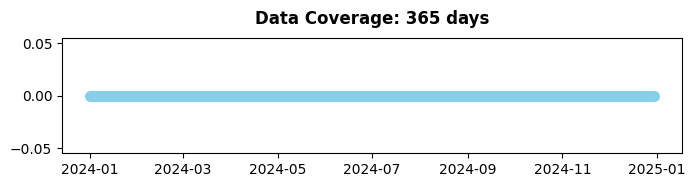

In [94]:
fig, ax = plt.subplots(figsize=(8, 1.5))

ax.set_title(f"Data Coverage: {duration +1 } days", fontsize=12, fontweight='bold', pad=10)

# Draw timeline
ax.plot([start_date, end_date], [0, 0], color='skyblue', linewidth=8, solid_capstyle='round')
plt.savefig("charts/DateRange.png", bbox_inches='tight', dpi=300)


## Information Regarding Wait time, Distance and Duration

In [77]:
# Average Wait Time
avg_wait_time = np.mean(df['Avg VTAT'])
print(f"Average Wait Time: {avg_wait_time : .2f}")

Average Wait Time:  8.46


In [80]:
# Average Trip Duration
completed_rides = df[df['Booking Status'] == 'Completed'] #Completed Rides
total_trip_duration = completed_rides['Avg CTAT'].sum() # Sum all's ride trip duration

avg_trip_duration = total_trip_duration / completed_rides.shape[0]
print(f"Average Trip Duration: {avg_trip_duration: .2f} minutes")

Average Trip Duration:  30.03 minutes


In [96]:
#Avaerge Ride Distance
completed_rides = df[df['Booking Status'] == 'Completed'] #Completed Rides
total_ride_distance = completed_rides['Ride Distance'].sum() # Sum all's ride distance

avg_ride_distance = total_ride_distance / completed_rides.shape[0]
print(f"Average Ride Distance: {avg_ride_distance: .2f} km")

Average Ride Distance:  26.00 km


## Rides Analysis


In [26]:
# Total Number of Rides Successfully Completed

total_rides = len(df) # number of rides
print(f"Number of Rides: {total_rides}")

no_driver_found_count = (df['Booking Status'] == 'No Driver Found').sum()
rides_completed = total_rides - (
    df['Incomplete Rides'].sum() + 
    df['Cancelled Rides by Customer'].sum() + 
    df['Cancelled Rides by Driver'].sum() + no_driver_found_count)

print(f"Number of Rides Completed: {rides_completed}")

Number of Rides: 150000
Number of Rides Completed: 93000.0


In [27]:
# Percentage of Rides Completed
rides_success_rate = (rides_completed / total_rides) * 100
print(f"Ride Sucess Rate: {rides_success_rate : .2f}%")

Ride Sucess Rate:  62.00%


In [135]:
df.index = pd.to_datetime(df.index)

rides_per_day = df.resample('D').size().reset_index(name='rides_per_day')
rides_per_day

,DateTime,rides_per_day
0,2024-01-01,414
1,2024-01-02,389
2,2024-01-03,384
3,2024-01-04,414
4,2024-01-05,416
...,...,...
360,2024-12-26,369
361,2024-12-27,431
362,2024-12-28,391
363,2024-12-29,417


In [136]:
# Rides per week (Mon - Sun week)
rides_per_week = df.resample('W-MON').size().rename('rides').reset_index()

rides_per_week.head()

,DateTime,rides
0,2024-01-01,414
1,2024-01-08,2836
2,2024-01-15,2922
3,2024-01-22,2971
4,2024-01-29,2910


In [142]:
# Monthly aggregation
rides_per_month = df.resample('M').size().rename('rides').reset_index()
rides_per_month.rename(columns={'DateTime': 'Month'}, inplace=True)

rides_per_month.head()


C:\Users\Manjot\AppData\Local\Temp\ipykernel_14612\46115003.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rides_per_month = df.resample('M').size().rename('rides').reset_index()


,Month,rides
0,2024-01-31,12861
1,2024-02-29,11927
2,2024-03-31,12719
3,2024-04-30,12199
4,2024-05-31,12778


In [55]:
#top 10 busiest days
top10_days = rides_per_day.sort_values(by='rides', ascending=False).head(10)
print(top10_days)


      DateTime  rides
320 2024-11-16    462
261 2024-09-18    456
129 2024-05-09    456
25  2024-01-26    452
285 2024-10-12    452
36  2024-02-06    452
198 2024-07-17    451
282 2024-10-09    451
286 2024-10-13    451
333 2024-11-29    450


In [52]:
# Busiest months
rides_per_month.sort_values(ascending=False)

DateTime
2024-07-31    12897
2024-01-31    12861
2024-05-31    12778
2024-03-31    12719
2024-10-31    12651
2024-08-31    12636
2024-06-30    12440
2024-11-30    12394
2024-12-31    12250
2024-09-30    12248
2024-04-30    12199
2024-02-29    11927
Name: rides, dtype: int64

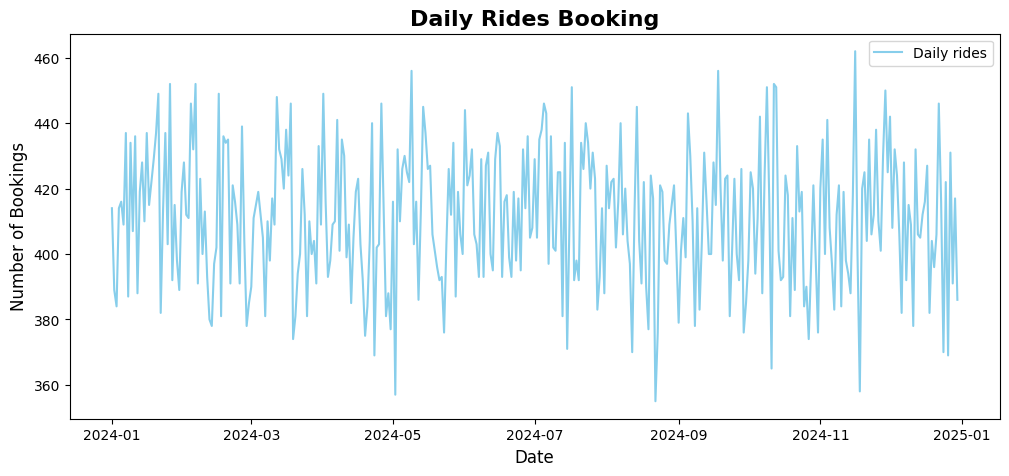

In [95]:
fig1 = plt.figure(figsize=(12, 5))
sns.lineplot(data=rides_per_day, x='DateTime', y='rides_per_day', color='skyblue', label='Daily rides')

plt.title('Daily Rides Booking', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.savefig("charts/DailyRideBooking.png", bbox_inches='tight', dpi=300)

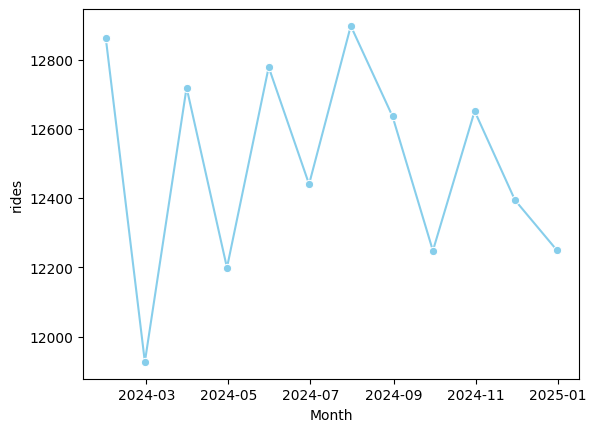

In [144]:
sns.lineplot(data=rides_per_month, x='Month', y='rides', marker='o', color='skyblue')
plt.savefig("charts/MonthlyRideBooking.png", bbox_inches='tight', dpi=300)

In [148]:
#Peak hours of booking
df['Hour'] = df.index.hour
hourly_counts = df.groupby('Hour').size().reset_index(name='rides')
hourly_counts.head()


,Hour,rides
0,0,1373
1,1,1360
2,2,1339
3,3,1383
4,4,1321


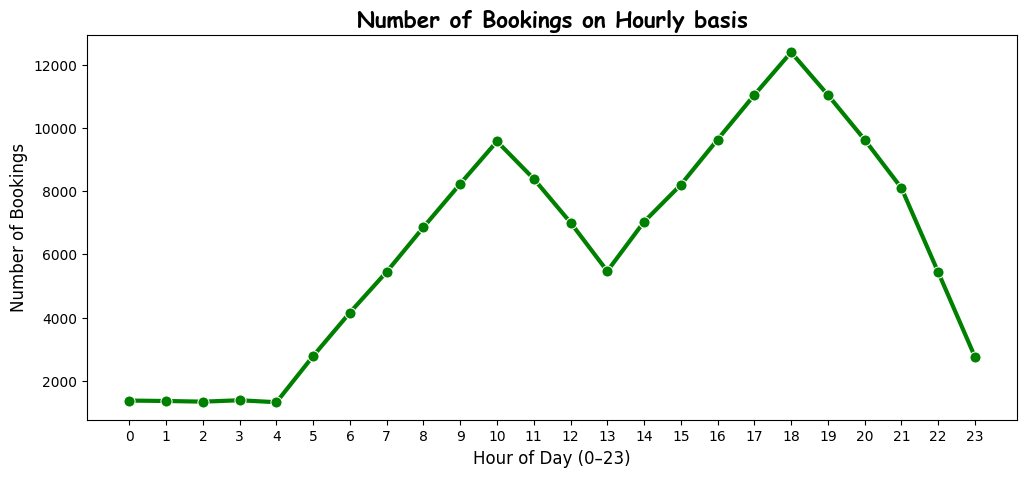

In [149]:
#Booking in a day on hourly basis
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_counts, x='Hour', y='rides', color='green', lw=3, marker='o', markersize=8)
plt.title('Number of Bookings on Hourly basis', fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(range(24))
plt.savefig("charts/HourlyRides.png", bbox_inches='tight', dpi=300)
plt.show()

In [150]:
#No. of rides on hourly basis on weekdays for 1 year
df = df.reset_index() # to use DateTime as a col
df['Weekday'] = df['DateTime'].dt.day_name()

pivot = df.groupby(['Weekday', 'Hour']).size().reset_index(name='rides')
pivot_table = pivot.pivot(index='Weekday', columns='Hour', values='rides')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(weekday_order)

pivot_table

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,204,209,206,203,183,446,594,770,1026,1204,...,1006,1166,1394,1578,1835,1564,1418,1215,728,409
Tuesday,179,186,206,206,185,418,626,795,1026,1141,...,1003,1198,1329,1539,1763,1596,1372,1166,798,381
Wednesday,208,188,195,180,185,369,621,775,942,1214,...,963,1170,1394,1606,1789,1565,1412,1109,791,428
Thursday,207,197,186,197,170,396,575,774,937,1148,...,987,1227,1357,1583,1687,1547,1364,1142,783,390
Friday,180,187,190,203,204,379,585,766,984,1168,...,1043,1156,1409,1542,1767,1576,1371,1107,762,362
Saturday,195,201,174,190,201,412,593,776,965,1158,...,1036,1168,1356,1604,1800,1559,1380,1171,789,422
Sunday,200,192,182,204,193,366,566,794,981,1201,...,993,1117,1394,1592,1756,1640,1313,1193,790,370


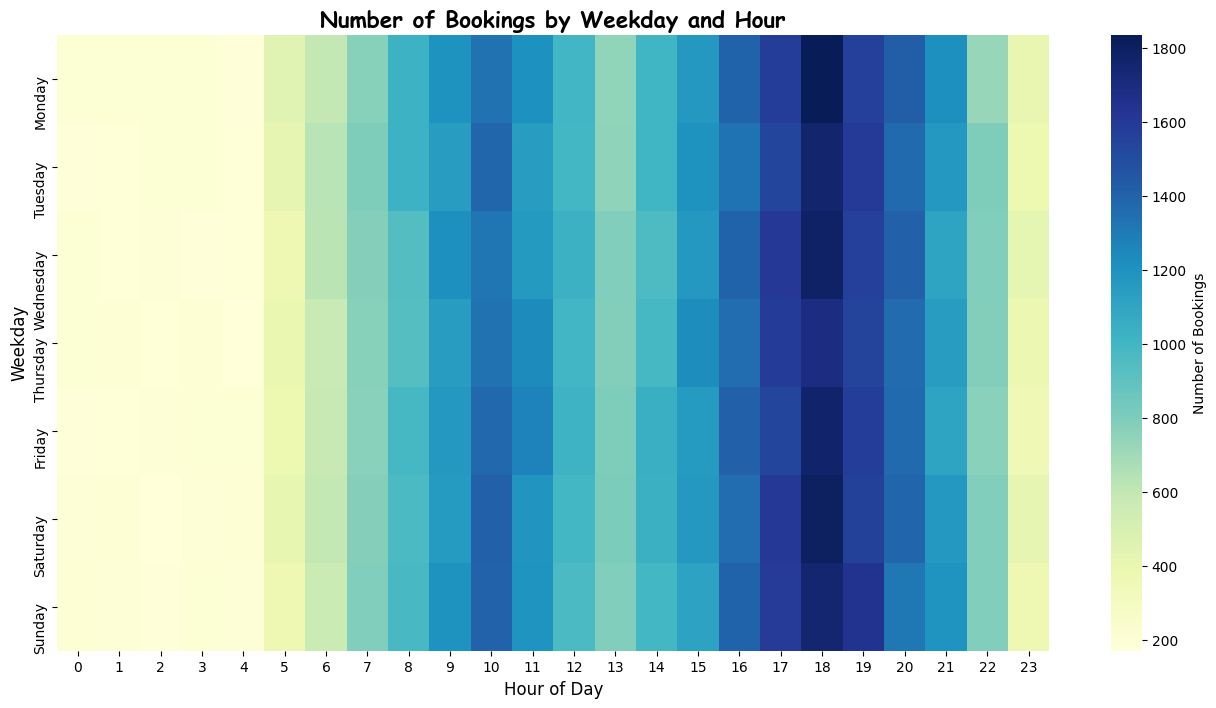

In [152]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='YlGnBu',
            cbar_kws={'label': 'Number of Bookings'})
plt.title('Number of Bookings by Weekday and Hour', fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.savefig("charts/Bookings.png", bbox_inches='tight', dpi=300)
plt.show()

## Successful vs Unsuccessful Rides Analysis

In [25]:
#Overall Booking status Count wise
status_counts = df['Booking Status'].value_counts()
status_counts.columns = ['Booking Status','Count']
status_counts

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [26]:
#Overall Booking status %age wise
total_rides = len(df)
status_counts = df['Booking Status'].value_counts()
percent = status_counts/total_rides*100
status_counts.columns = ['Booking Status','Percentage']
percent

Booking Status
Completed                62.0
Cancelled by Driver      18.0
No Driver Found           7.0
Cancelled by Customer     7.0
Incomplete                6.0
Name: count, dtype: float64

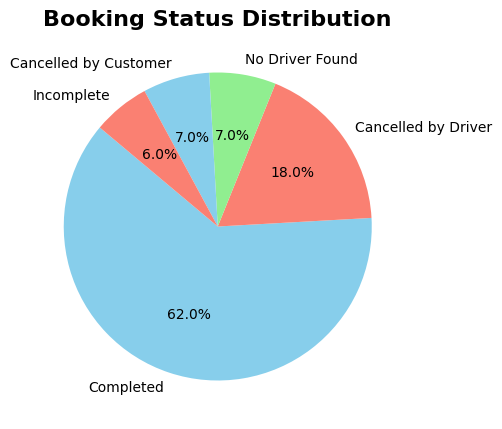

In [31]:
plt.figure(figsize=(5, 5))
plt.pie(percent, labels=percent.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Booking Status Distribution', fontsize=16, fontweight='bold')
plt.savefig("charts/status1.png", bbox_inches='tight', dpi=300)
plt.show()

In [33]:
# Treat any non-zero value as a cancellation
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'] > 0
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'] > 0

cancel_by_customer = df['Cancelled Rides by Customer'].sum()
cancel_by_driver = df['Cancelled Rides by Driver'].sum()

cancel_df = pd.DataFrame({
    'Canceller': ['Customer', 'Driver'],
    'Count': [cancel_by_customer, cancel_by_driver]
})

print(cancel_df)


  Canceller  Count
0  Customer  10500
1    Driver  27000


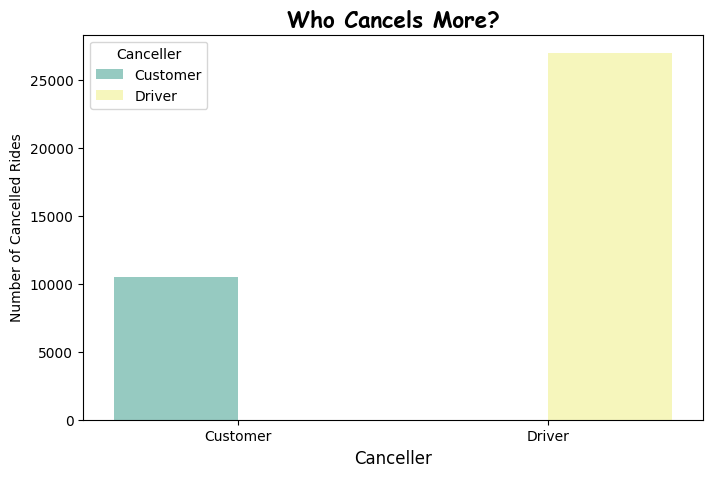

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(data=cancel_df, x='Canceller', y='Count', hue='Canceller', palette='Set3')
plt.title('Who Cancels More?', fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')
plt.xlabel('Canceller', fontsize=12)
plt.ylabel('Number of Cancelled Rides')
plt.savefig("charts/cancel.png", bbox_inches='tight', dpi=300)
plt.show()

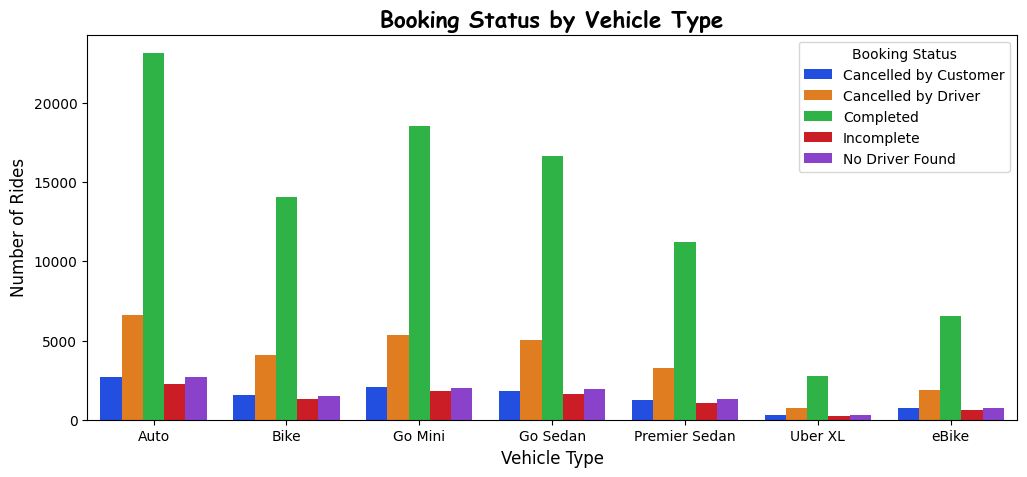

In [28]:
#Booking status by Vehicle Type
status_vehicle = df.groupby(['Vehicle Type', 'Booking Status'], observed=True).size().reset_index(name='count')
status_vehicle.head()
plt.figure(figsize=(12, 5))
sns.barplot(data=status_vehicle, x='Vehicle Type', y='count', hue='Booking Status', palette='bright')
plt.title('Booking Status by Vehicle Type', fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.legend(title='Booking Status')
plt.savefig("charts/StatusVehicle.png", bbox_inches='tight', dpi=300)
plt.show()

## Cancellation Reasons Analysis

In [36]:
#By Customer
cust_cancel_reasons = df['Reason for cancelling by Customer'].value_counts().reset_index()
cust_cancel_reasons.columns = ['Reason', 'Count']
cust_cancel_reasons

,Reason,Count
0,Wrong Address,2362
1,Change of plans,2353
2,Driver is not moving towards pickup location,2335
3,Driver asked to cancel,2295
4,AC is not working,1155


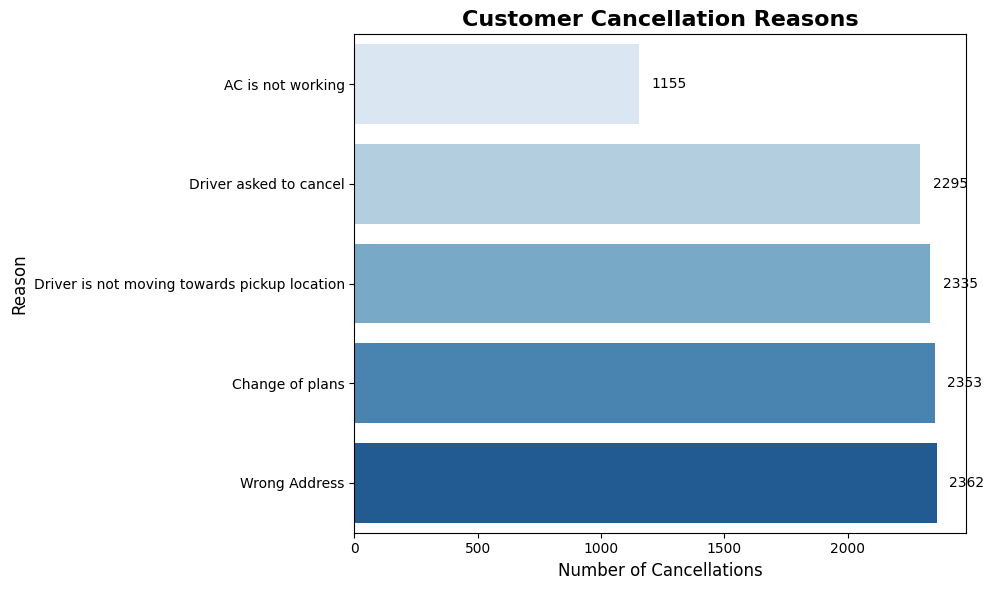

In [46]:
# Sorting in descending order
cust_cancel_reasons_sorted = cust_cancel_reasons.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Reason', data=cust_cancel_reasons_sorted, palette='Blues')
plt.title('Customer Cancellation Reasons', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reason', fontsize=12)

# Show counts on bars
for index, value in enumerate(cust_cancel_reasons_sorted['Count']):
    plt.text(value + 50, index, str(value), va='center')

plt.tight_layout()
plt.savefig("charts/customer.png", bbox_inches='tight', dpi=300)
plt.show()



In [38]:
#Driver Cancellation Reasons
driver_cancel_reasons = df['Driver Cancellation Reason'].value_counts().reset_index()
driver_cancel_reasons.columns = ['Reason', 'Count']
driver_cancel_reasons

,Reason,Count
0,Customer related issue,6837
1,The customer was coughing/sick,6751
2,Personal & Car related issues,6726
3,More than permitted people in there,6686


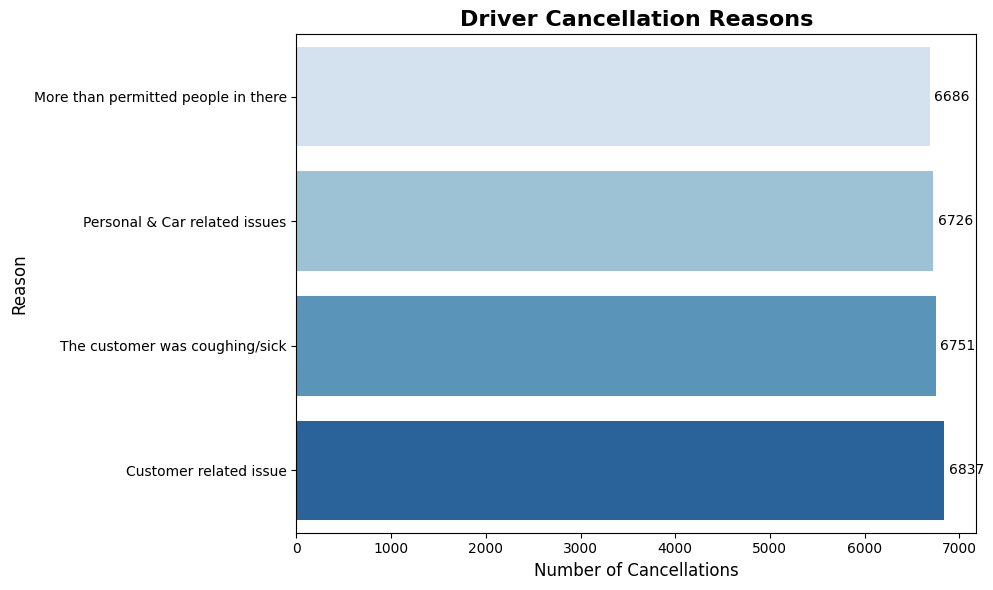

In [42]:
driver_cancel_reasons_sorted = driver_cancel_reasons.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Reason', data=driver_cancel_reasons_sorted, palette='Blues')
plt.title('Driver Cancellation Reasons', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reason', fontsize=12)

# Show counts on bars
for index, value in enumerate(driver_cancel_reasons_sorted['Count']):
    plt.text(value + 50, index, str(value), va='center')

plt.tight_layout()
plt.savefig("charts/drivercancel.png", bbox_inches='tight', dpi=300)
plt.show()


## Vehicle Analysis

In [47]:
#Vehicle Preferences
vehicle_counts = df['Vehicle Type'].value_counts().reset_index()
vehicle_counts.columns = ['Vehicle Type', 'Count']
vehicle_counts

,Vehicle Type,Count
0,Auto,37419
1,Go Mini,29806
2,Go Sedan,27141
3,Bike,22517
4,Premier Sedan,18111
5,eBike,10557
6,Uber XL,4449


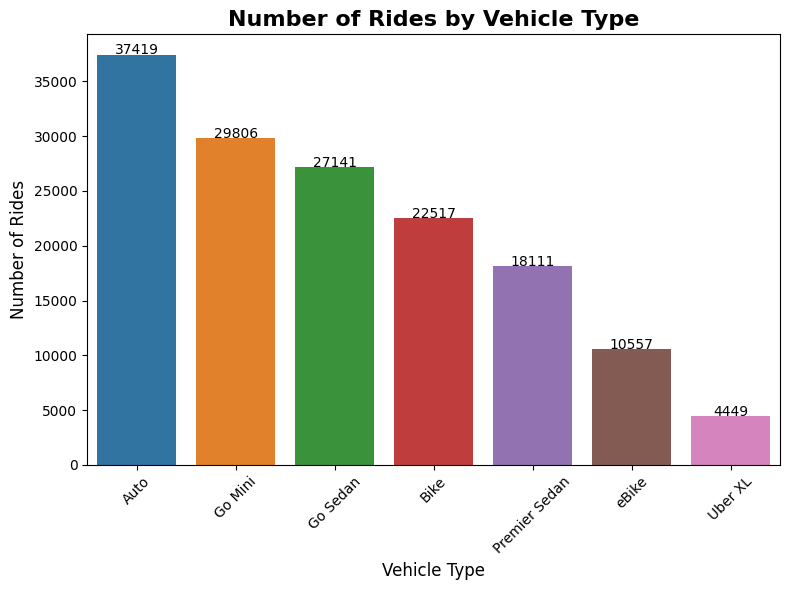

In [49]:
vehicle_counts_sorted = vehicle_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Vehicle Type', y='Count', data=vehicle_counts_sorted)

plt.title('Number of Rides by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)  # rotate x labels if needed

# Add counts on top of bars
for index, value in enumerate(vehicle_counts_sorted['Count']):
    plt.text(index, value + 50, str(value), ha='center')

plt.tight_layout()
plt.savefig("charts/vehicles.png", bbox_inches='tight', dpi=300)
plt.show()

In [50]:
#Vehicle Performance - Type of Vehicle, Avg Distance Covered, Fare and Success Rate
vehicle_stats = (df.groupby('Vehicle Type', observed=True).agg({'Ride Distance':'mean', 'Booking Value':'mean'}).reset_index()
                  .rename(columns={'Ride Distance':'Avg Distance (km)', 'Booking Value':'Avg Fare'}))

vehicle_success = df.groupby('Vehicle Type', observed=True)['Booking Status'].apply(lambda x: (x == 'Completed').mean() * 100) \
                .reset_index(name='Success Rate (%)')
final_vehicle_analysis = vehicle_stats.merge(vehicle_success, on='Vehicle Type')
final_vehicle_analysis

,Vehicle Type,Avg Distance (km),Avg Fare,Success Rate (%)
0,Auto,24.615996,506.725241,61.880328
1,Bike,24.649546,510.200299,62.326242
2,Go Mini,24.612090,507.684934,62.232436
3,Go Sedan,24.609325,511.503385,61.442099
4,Premier Sedan,24.598956,509.568169,62.127989
5,Uber XL,24.402893,501.816749,62.553383
6,eBike,24.990415,503.897090,62.053614


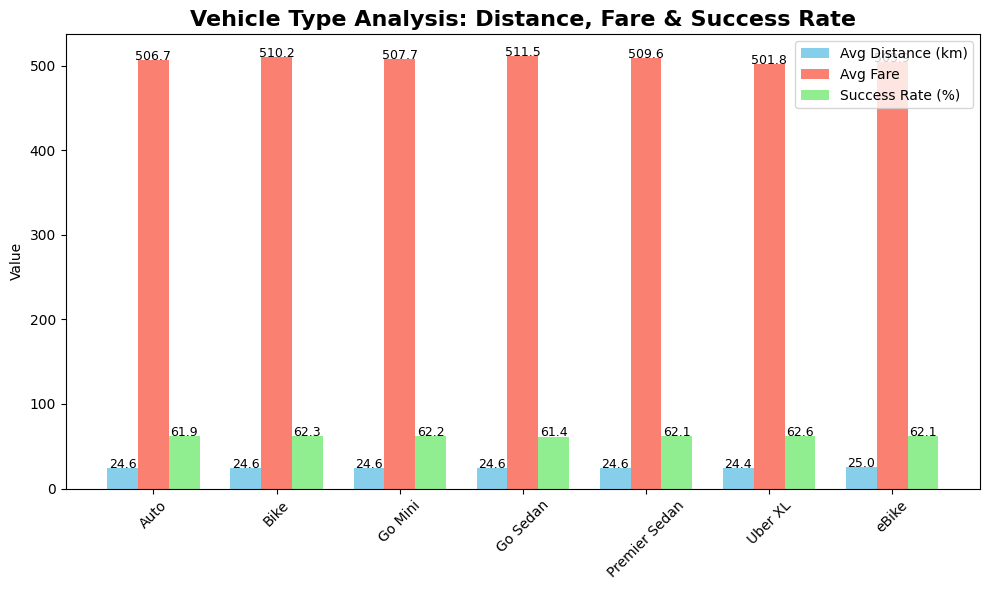

In [52]:

plt.figure(figsize=(10,6))

x = np.arange(len(final_vehicle_analysis['Vehicle Type']))
width = 0.25  # width of each bar

plt.bar(x - width, final_vehicle_analysis['Avg Distance (km)'], width, label='Avg Distance (km)', color='skyblue')
plt.bar(x, final_vehicle_analysis['Avg Fare'], width, label='Avg Fare', color='salmon')
plt.bar(x + width, final_vehicle_analysis['Success Rate (%)'], width, label='Success Rate (%)', color='lightgreen')

# Labels and title
plt.xticks(x, final_vehicle_analysis['Vehicle Type'], rotation=45)
plt.ylabel('Value')
plt.title('Vehicle Type Analysis: Distance, Fare & Success Rate', fontsize=16, fontweight='bold')
plt.legend()

for i in range(len(x)):
    plt.text(x[i]-width, final_vehicle_analysis['Avg Distance (km)'][i]+0.1, f"{final_vehicle_analysis['Avg Distance (km)'][i]:.1f}", ha='center', fontsize=9)
    plt.text(x[i], final_vehicle_analysis['Avg Fare'][i]+0.1, f"{final_vehicle_analysis['Avg Fare'][i]:.1f}", ha='center', fontsize=9)
    plt.text(x[i]+width, final_vehicle_analysis['Success Rate (%)'][i]+0.1, f"{final_vehicle_analysis['Success Rate (%)'][i]:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("charts/vehicleType.png", bbox_inches='tight', dpi=300)
plt.show()


## Revenue Analysis

In [49]:
#Average Revenue per Ride
revenue_ride = df['Booking Value'].sum() / total_rides
print(f"Total Revenue: Rs.{df['Booking Value'].sum():.2f}")
print(f"Total Revenue per Ride: Rs.{revenue_ride:.2f}")

Total Revenue: Rs.71718183.00
Total Revenue per Ride: Rs.478.12


In [43]:
completed = df[df['Booking Status'] == 'Completed'].copy()
completed.shape

(93000, 24)

In [12]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [13]:
#Monthly Revenue
df = df.reset_index()
df['YearMonth'] = df['DateTime'].dt.to_period('M').astype('str')

monthly_revenue = df.groupby('YearMonth')['Booking Value'].sum().reset_index()
monthly_revenue

,YearMonth,Booking Value
0,2024-01,4411069.0
1,2024-02,4085790.0
2,2024-03,4568188.0
3,2024-04,4253789.0
4,2024-05,4320679.0
5,2024-06,4325660.0
6,2024-07,4365923.0
7,2024-08,4243509.0
8,2024-09,4191393.0
9,2024-10,4417170.0


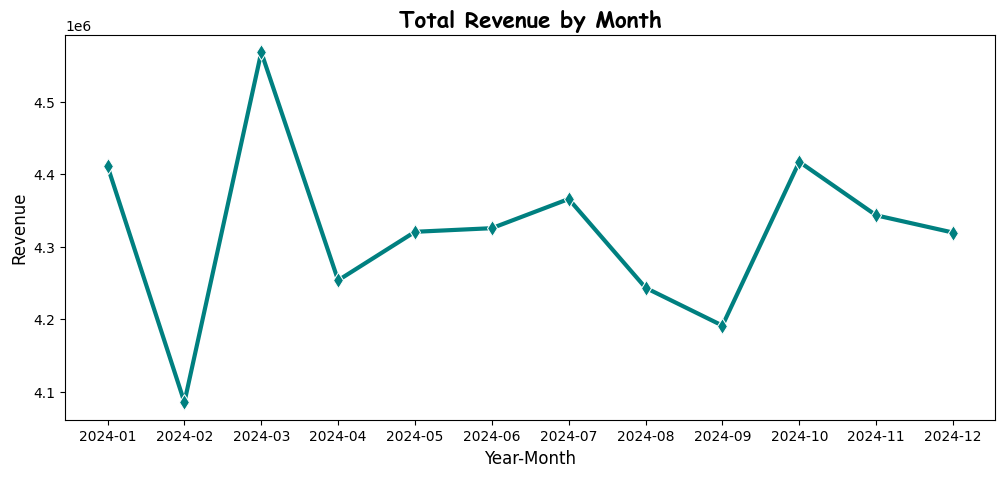

In [16]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Booking Value', color='teal', lw=3, marker='d', markersize=8)
plt.title('Total Revenue by Month', fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Year-Month', fontsize=12)
plt.savefig("charts/RevenueByMonth.png", bbox_inches='tight', dpi=300)

plt.show()

In [17]:
#Revenue Distribution by payment method
payment_revenue = df.groupby('Payment Method', observed=True)['Booking Value'].sum().reset_index()
payment_revenue

,Payment Method,Booking Value
0,Cash,12895649.0
1,Credit Card,5224025.0
2,Debit Card,4180510.0
3,UPI,23345101.0
4,Uber Wallet,6200898.0


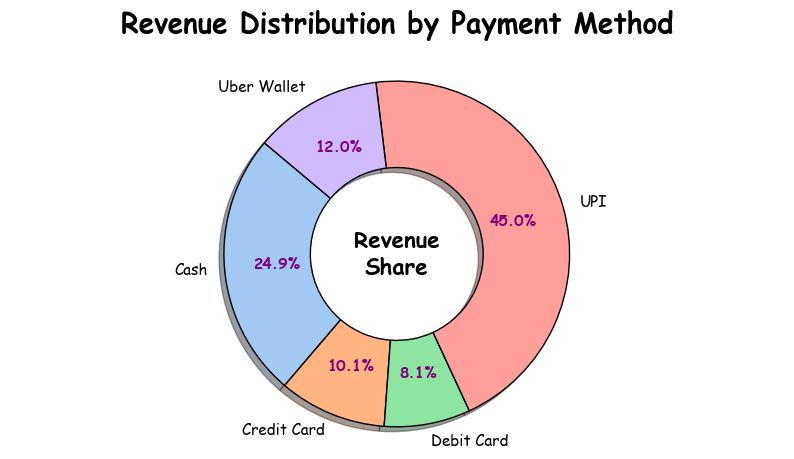

In [24]:
plt.figure(figsize=(10, 5))

wedges, texts, autotexts = plt.pie(payment_revenue['Booking Value'], labels=payment_revenue['Payment Method'],
                            autopct='%1.1f%%', colors=sns.color_palette('pastel', len(payment_revenue)),
                            startangle=140, pctdistance=0.70, shadow=True,
                            wedgeprops={'width': 0.5, 'edgecolor': 'black', 'linewidth': 1},
                            textprops={'fontsize': 11, 'fontfamily': 'Comic Sans MS'})

for autotext in autotexts:
    autotext.set_color('purple')
    autotext.set_fontweight('bold')

plt.text(0, 0, 'Revenue\nShare', horizontalalignment='center', verticalalignment='center',
         fontsize=16, fontweight='bold', fontfamily='Comic Sans MS')

plt.title('Revenue Distribution by Payment Method', fontsize=20, fontweight='bold', fontfamily='Comic Sans MS', pad=20)
plt.axis('equal')
plt.savefig("charts/RevenuePayment.png", bbox_inches='tight', dpi=300)

plt.show()

## Rating Analysis for Ride Experience Analysis

In [51]:
#Driver Rating
avg_ratings_driver = np.mean(df['Driver Ratings'])
print(f"Driver Average Rating: {avg_ratings_driver:.2f} / 5 stars")

Driver Average Rating: 4.26 / 5 stars


In [52]:
#Customer Rating
avg_ratings_customer = np.mean(df['Customer Rating'])
print(f"Customer Average Rating: {avg_ratings_customer:.2f} / 5 stars")

Customer Average Rating: 4.44 / 5 stars


## Location wise Analysis

In [4]:
# top 10 pickup locations
top_pickups = df['Pickup Location'].value_counts().head(10)
top_pickups

Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64

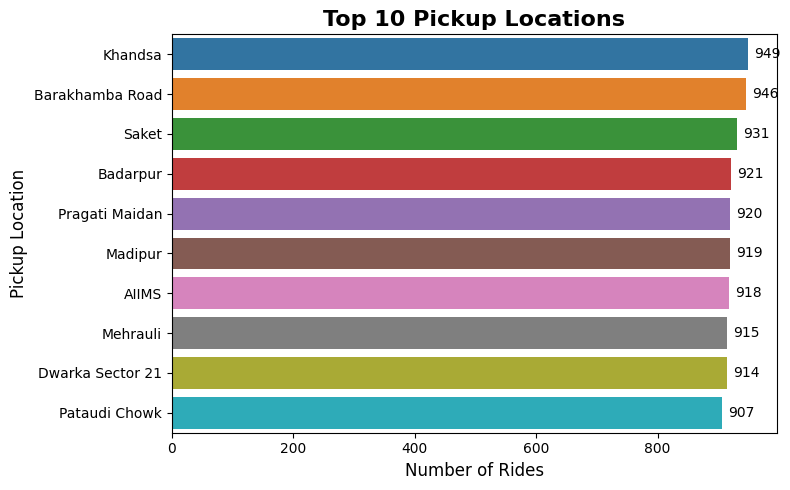

In [6]:
top_pickups_df = top_pickups.reset_index()
top_pickups_df.columns = ['Pickup Location', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Pickup Location', data=top_pickups_df)

plt.title('Top 10 Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Pickup Location', fontsize=12)

# Show counts on bars
for index, value in enumerate(top_pickups_df['Count']):
    plt.text(value + 10, index, str(value), va='center')

plt.tight_layout()
plt.savefig("charts/PickupLocs.png", bbox_inches='tight', dpi=300)

plt.show()

In [7]:
#Top 10 drop locations
top_drops = df['Drop Location'].value_counts().head(10)
top_drops

Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Nehru Place           902
Name: count, dtype: int64

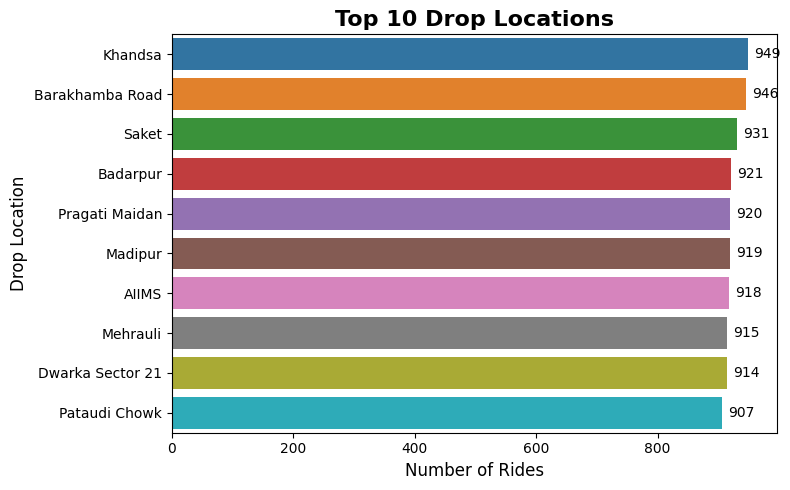

In [8]:
top_pickups_df = top_pickups.reset_index()
top_pickups_df.columns = ['Drop Location', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Drop Location', data=top_pickups_df)

plt.title('Top 10 Drop Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Drop Location', fontsize=12)

# Show counts on bars
for index, value in enumerate(top_pickups_df['Count']):
    plt.text(value + 10, index, str(value), va='center')

plt.tight_layout()
plt.savefig("charts/DropLocs.png", bbox_inches='tight', dpi=300)

plt.show()

## Revenue from top 10 locations

In [19]:
# top 10 pickup locations Revenue
top_10_pickups = df['Pickup Location'].value_counts().head(10).index

pickup_revenue = df[df['Pickup Location'].isin(top_10_pickups)].groupby('Pickup Location')['Booking Value'].sum().reset_index()

pickup_revenue = pickup_revenue.sort_values(by='Booking Value', ascending=False)
print(pickup_revenue)



    Pickup Location  Booking Value
2   Barakhamba Road       341154.0
4           Khandsa       338502.0
7     Pataudi Chowk       328572.0
1          Badarpur       327193.0
0             AIIMS       325733.0
5           Madipur       320235.0
3  Dwarka Sector 21       316045.0
8    Pragati Maidan       303314.0
6          Mehrauli       300668.0
9             Saket       292470.0


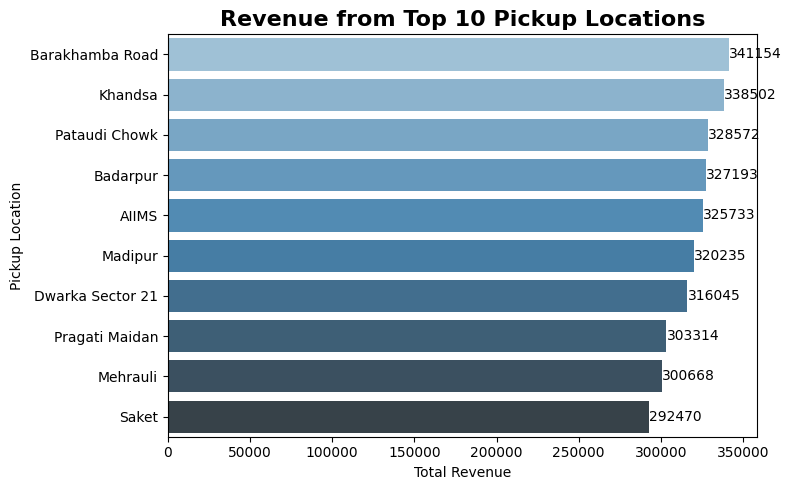

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Booking Value', y='Pickup Location', data=pickup_revenue, palette='Blues_d')
plt.title('Revenue from Top 10 Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue')
plt.ylabel('Pickup Location')

# Add values on bars
for index, value in enumerate(pickup_revenue['Booking Value']):
    plt.text(value + 100, index, f"{value:.0f}", va='center')

plt.tight_layout()
plt.savefig("charts/RevenuePickup.png", bbox_inches='tight', dpi=300)

plt.show()

In [22]:
#top 10 drop locations revenue
top_10_drops = df['Drop Location'].value_counts().head(10).index

# Filter rides ending at top drops and sum revenue
drop_revenue = df[df['Drop Location'].isin(top_10_drops)].groupby('Drop Location')['Booking Value'].sum().reset_index()

drop_revenue = drop_revenue.sort_values(by='Booking Value', ascending=False)
drop_revenue


,Drop Location,Booking Value
7,Narsinghpur,354521.0
5,Lajpat Nagar,327451.0
6,Lok Kalyan Marg,320227.0
0,Ashram,312561.0
9,Udyog Vihar,306601.0
1,Basai Dhankot,302856.0
4,Kashmere Gate ISBT,300929.0
2,Cyber Hub,300462.0
3,Kalkaji,297708.0
8,Nehru Place,296116.0


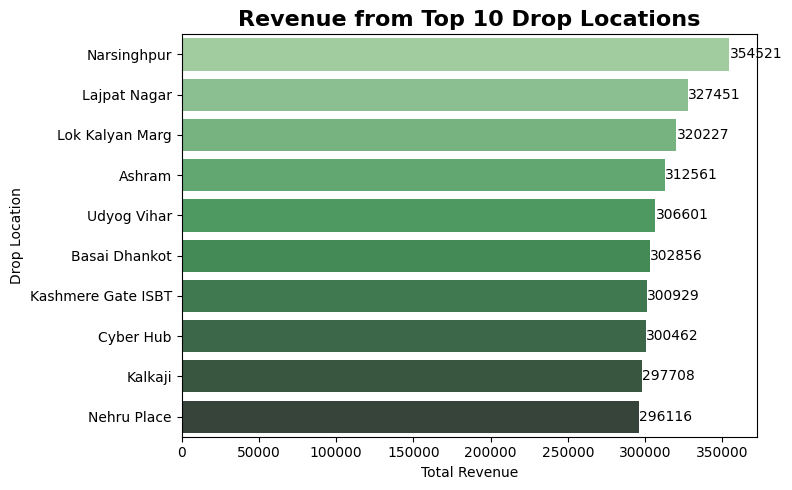

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Booking Value', y='Drop Location', data=drop_revenue, palette='Greens_d')
plt.title('Revenue from Top 10 Drop Locations', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue')
plt.ylabel('Drop Location')

for index, value in enumerate(drop_revenue['Booking Value']):
    plt.text(value + 100, index, f"{value:.0f}", va='center')

plt.tight_layout()
plt.savefig("charts/RevenueDrop.png", bbox_inches='tight', dpi=300)
plt.show()


In [73]:
#Total Contribution to Revenue by top 10 pickup n drop locations
pickup_top10_total = pickup_revenue['Booking Value'].sum()
drop_top10_total = drop_revenue['Booking Value'].sum()

pickup_contribution = (pickup_top10_total / total_revenue) * 100
drop_contribution = (drop_top10_total / total_revenue) * 100

print(f"Top 10 Pickup Locations contribute {pickup_contribution:.2f}% of total revenue")
print(f"Top 10 Drop Locations contribute {drop_contribution:.2f}% of total revenue")


Top 10 Pickup Locations contribute 6.16% of total revenue
Top 10 Drop Locations contribute 6.05% of total revenue
